In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('exam.txt', names = ['exam1', 'exam2', 'adm'])
df.head()

,exam1,exam2,adm
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
df.shape

(100, 3)

In [4]:
y = df['adm'].values
X = df.drop(['adm'], axis=1).values
print(X.shape, y.shape)

(100, 2) (100,)


In [5]:
msk = np.random.rand(len(X)) < 0.7
X_train = X[msk]
X_test = X[~msk]
y_train = y[msk]
y_test = y[~msk]
print(X_train.shape, X_test.shape)

(65, 2) (35, 2)


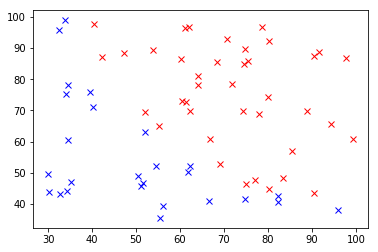

In [6]:
for i in range(X_train.shape[0]):
    if y_train[i]==1:
        plt.plot(X_train[i,0],X_train[i,1],'rx')
    else:
        plt.plot(X_train[i,0],X_train[i,1],'bx')
plt.show()

In [7]:
#Normalizing
X_train = (X_train-np.min(X_train,axis=0))/(np.max(X_train,axis=0)-np.min(X_train,axis=0))
X_test = (X_test-np.min(X_test,axis=0))/(np.max(X_test,axis=0)-np.min(X_test,axis=0))

In [8]:
#Adding row for bias
X_train = np.concatenate( (np.ones((X_train.shape[0],1)),X_train) , axis=1)
X_test = np.concatenate( (np.ones((X_test.shape[0],1)),X_test) , axis=1)
print(X_train.shape)

(65, 3)


In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def sig_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

In [10]:
m,n = X_train.shape # n is the shape of original_X.shape[0]+1
theta = np.random.rand(1,n)
print(theta)

def get_h(X, theta):
    h = sigmoid(X@theta.T)
    h = h.reshape(-1)
    return h

h = get_h(X_train, theta)
print(h.shape)

[[0.68710917 0.65514304 0.01126103]]
(65,)


In [11]:
def get_cost(h,y):
    return -(1/m)*(y.T@np.log(1-h) + (1-y).T@np.log(1-h))
# get_cost(h,y)

In [12]:
def gd(X,y,theta,alpha,lam,it):
    i=0
    while(i<it):
        h = sigmoid(X@theta.T).reshape(-1)
        theta = theta - alpha/m*(X.T@(h-y)) - lam/m*np.sum(theta[:,1:])
#         theta = theta*(1-(alpha*lam/m)) - alpha/m*(X.T@(h-y)) 
        i+=1
    return theta

## Without regularization

In [13]:
alphas = [0.0001, 0.001, 0.01, 0.1] #, 1, 10, 100

for alpha in alphas:
    thetax = gd(X_train,y_train,theta,alpha,0,10000) #Regularization=0

    #Testing
    h = sigmoid(X_test@thetax.T)
    h = (h>=0.5)*1
    h = h.reshape(-1)
#     err = np.sum(np.abs(h-y))/y.shape[0]
    acc = np.sum(h==y_test)/y_test.shape[0]
    print("Alpha = " + str(alpha) + ", Accuracy % = " + str(acc))


Alpha = 0.0001, Accuracy % = 0.6
Alpha = 0.001, Accuracy % = 0.6
Alpha = 0.01, Accuracy % = 0.9142857142857143
Alpha = 0.1, Accuracy % = 0.9428571428571428


## With regularization

In [14]:
alphas = [0.0001, 0.001, 0.01, 0.1] #, 1, 10, 100
lams = [0,0.001,0.01,0.1,1,10]

for lam in lams:
    print("Lambda = " + str(lam))
    for alpha in alphas:
        thetax = gd(X_train,y_train,theta,alpha,lam,10000)
        
        #Testing
        h = sigmoid(X_test@thetax.T)
        h = (h>=0.5)*1
        h = h.reshape(-1)
    #     err = np.sum(np.abs(h-y))/y.shape[0]
        acc = np.sum(h==y_test)/y_test.shape[0]
        print("Alpha = " + str(alpha) + ", Accuracy % = " + str(acc))
    print("--------------------------")

Lambda = 0
Alpha = 0.0001, Accuracy % = 0.6
Alpha = 0.001, Accuracy % = 0.6
Alpha = 0.01, Accuracy % = 0.9142857142857143
Alpha = 0.1, Accuracy % = 0.9428571428571428
--------------------------
Lambda = 0.001
Alpha = 0.0001, Accuracy % = 0.6
Alpha = 0.001, Accuracy % = 0.6
Alpha = 0.01, Accuracy % = 0.9428571428571428
Alpha = 0.1, Accuracy % = 0.9428571428571428
--------------------------
Lambda = 0.01
Alpha = 0.0001, Accuracy % = 0.6
Alpha = 0.001, Accuracy % = 0.6857142857142857
Alpha = 0.01, Accuracy % = 0.9428571428571428
Alpha = 0.1, Accuracy % = 0.9142857142857143
--------------------------
Lambda = 0.1
Alpha = 0.0001, Accuracy % = 0.6
Alpha = 0.001, Accuracy % = 0.6
Alpha = 0.01, Accuracy % = 0.7428571428571429
Alpha = 0.1, Accuracy % = 0.9142857142857143
--------------------------
Lambda = 1
Alpha = 0.0001, Accuracy % = 0.6
Alpha = 0.001, Accuracy % = 0.5142857142857142
Alpha = 0.01, Accuracy % = 0.4
Alpha = 0.1, Accuracy % = 0.7428571428571429
--------------------------
Lambda

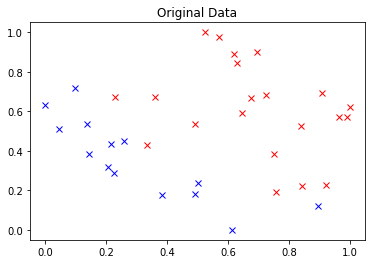

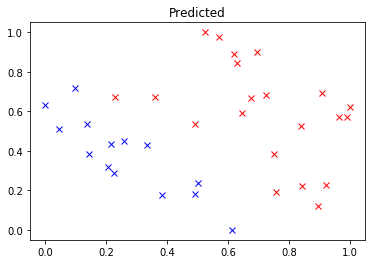

In [15]:
thetax = gd(X_train,y_train,theta,0.01,0.01,10000)

h = sigmoid(X_test@thetax.T)
h = (h>=0.5)*1
h = h.reshape(-1)

def plot_graph(X,y,h):
    mask = y==1
    plt.plot(X[mask,1],X[mask,2],'rx')
    plt.plot(X[~mask,1],X[~mask,2],'bx')
    plt.title("Original Data")
    plt.show()

    mask = h==1
    plt.plot(X[mask,1],X[mask,2],'rx')
    plt.plot(X[~mask,1],X[~mask,2],'bx')
    plt.title('Predicted')
    plt.show()
    
plot_graph(X_test,y_test,h)

## Conclusion
An approximate accuracy of 90% is obtained with alpha 0.01 and lambda 0.01.

# Newton's Method

In [16]:
df = pd.read_csv('exam.txt', names = ['exam1', 'exam2', 'adm'])
y = df['adm'].values
X = df.drop(['adm'], axis=1).values

msk = np.random.rand(len(X)) < 0.7
X_train = X[msk]
X_test = X[~msk]
y_train = y[msk]
y_test = y[~msk]

#Normalizing
X_train = (X_train-np.min(X_train,axis=0))/(np.max(X_train,axis=0)-np.min(X_train,axis=0))
X_test = (X_test-np.min(X_test,axis=0))/(np.max(X_test,axis=0)-np.min(X_test,axis=0))

#Adding row for bias
X_train = np.concatenate( (np.ones((X_train.shape[0],1)),X_train) , axis=1)
X_test = np.concatenate( (np.ones((X_test.shape[0],1)),X_test) , axis=1)

m,n = X_train.shape # n is the shape of original_X.shape[0]+1
theta = np.random.rand(1,n)
print(X_train.shape, y_train.shape, m, n, theta.shape)

(69, 3) (69,) 69 3 (1, 3)


In [17]:
# #Adding row for bias
# X_train = np.concatenate( (np.ones((X_train.shape[0],1)),X_train) , axis=1)
# X_test = np.concatenate( (np.ones((X_test.shape[0],1)),X_test) , axis=1)
# print(X_train.shape)

In [18]:
# # Newtons method
# def newton(x,y,m,theta):
# #     print(x.shape, y.shape, theta.shape)
#     MAX_ITR = 3;
#     J = np.zeros([MAX_ITR, 1]);

#     for i in range(MAX_ITR):
#         h = get_h(x, theta)
# #         print("h.shape: " +str(h.shape))
#         grad = (1/m) * x.T @ (h-y);
#         H = (1/m) * x.T @ np.diag(h) @ np.diag(1-h) @ x
#         print(H)
# #         print("H.shape: " + str(H.shape))

#         # Calculate J (for testing convergence)
#     #     J(i) =(1/m)*sum(-y.*log(h) - (1-y).*log(1-h));
#         J[i] = get_cost(h,y)
# #         print(np.linalg.inv(H)*grad)
#         if not np.any(H) != 0:
#             theta = theta - (np.linalg.inv(H)*grad)[0,:]
#         else:
#             print("Warning: Inverse of a zero matrix is not possible")
#             break
#     # Display theta

#     print(theta)

#     # % Calculate the probability that a student with Score 20 on exam 1 and score 80 on exam 2 
#     # % will not be admitted
# #     prob = 1 - sigmoid([1, 20, 80]*theta)


#     # Plot J
#     plt.plot(np.arange(0,MAX_ITR), J, 'o--')
#     plt.xlabel('Iteration')
#     plt.ylabel('J')
#     plt.show()

# #     Plot Newton's method result
# #     Only need 2 points to define a line, so choose two endpoints
#     plot_x = [min(x[:,2])-2,  max(x[:,2])+2];
# #     Calculate the decision boundary line
#     plot_y = (-1/theta[:,2])*(theta[:,1]*plot_x +theta[:,0]);
#     plt.plot(plot_x, plot_y)
# #     plt.legend('Admitted', 'Not admitted', 'Decision Boundary')
#     plt.show()

    
def newton2(x, y, m, w):
    delta_J = np.zeros((x.shape[1],1))
    for i in range(1,m):
        z = np.matmul(x[i],w)
        h = 1/(1 + np.exp(-z))
        x_dum = x[i]
        x_dum = np.reshape(x_dum,(x_dum.shape[0],1))
        x_dum = (h-y[i])*x_dum
        delta_J = np.add(delta_J , x_dum)
    
    print(x.shape)
    print(y.shape)
    print(delta_J)
    print(delta_J.shape)
    
    
    J_prev = 100
    iterations = 0
    log = np.array([])
    while(iterations<100 ):
        Hessian = np.zeros((n,n))
        for i in range(1,m):
            z = np.matmul(x[i],w)
            h = 1/(1 + np.exp(-z))
#             print("x,w,h, hessian: " +str(x.shape) +  str(x_dum.shape) + str(h.shape) + str(Hessian.shape))
            x_dum = x[i]
            x_dum = np.reshape(x_dum,(x_dum.shape[0],1))
            Hessian =  np.add(Hessian,(h*(1-h)*np.dot(x_dum.T,x_dum)))
        delta_j = np.zeros((x.shape[1],1))
        for i in range(1,m):
            z = np.matmul(x[i],w)
            h = 1/(1 + np.exp(-z))
            x_dum = x[i]
            x_dum = np.reshape(x_dum,(x_dum.shape[0],1))
            x_dum = (h-y[i])*x_dum
            delta_J = np.add(delta_J , x_dum)
        
        if not np.any(Hessian) != 0:
            Hessian_inv = inv(Hessian)
        else:
            break
        w = np.subtract(w,np.matmul(Hessian_inv,delta_J))
        print(" w = " , w)
        #w = w_new
        z = np.dot(x,w)
        J_prev = J
        #print(" z = ",z)
        #w1 = np.log(1/(1 + np.exp(-z)))
        #w2 = np.log(1-(1/(1 + np.exp(-z))))
        #J  = (-1/m)*np.sum(y*w1 + (1-y)*w2)
        #print(" J = " , J)

        #print(J)
        log = np.append(log, J)
        iterations+=1
    return w

    
m,n = X_train.shape # n is the shape of original_X.shape[0]+1
# theta = np.random.rand(1,n)
theta = np.random.rand(n,1)
theta = newton2(X_train,y_train,m,theta)
print(theta)

(69, 3)
(69,)
[[15.27586008]
 [ 4.30580194]
 [ 1.74412001]]
(3, 1)
[[0.95265555]
 [0.58751663]
 [0.62009038]]


In [19]:
h_test_ = sigmoid(X_test@theta)>0.5
h_test = (h_test_>=0.5)*1
h_test = h_test.reshape(-1)

In [20]:
acc = np.sum(h_test == y_test)/h.shape
print(acc)

[0.54285714]
